# All code

In [7]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linear_sum_assignment
import networkx as nx

In [8]:
# Your original TASKS list
original_TASKS = [
    {'job': 'J1', 'machine': 'M1', 'dur': 45, 'prec': None},
    {'job': 'J1', 'machine': 'M3', 'dur': 10, 'prec': ('J1', 'M1')},
    {'job': 'J1', 'machine': 'M2', 'dur': 20, 'prec': ('J1', 'M3')},
    {'job': 'J2', 'machine': 'M1', 'dur': 20, 'prec': None},
    {'job': 'J2', 'machine': 'M2', 'dur': 10, 'prec': ('J2', 'M3')},
    {'job': 'J2', 'machine': 'M3', 'dur': 34, 'prec': ('J2', 'M1')},
    {'job': 'J3', 'machine': 'M1', 'dur': 12, 'prec': ('J3', 'M3')},
    {'job': 'J3', 'machine': 'M2', 'dur': 17, 'prec': ('J3', 'M1')},
    {'job': 'J3', 'machine': 'M3', 'dur': 28, 'prec': None}
    ]

In [69]:
# la01
TASK = [
    {'job': 'J1', 'machine': 'M2', 'dur': 21, 'prec': None},
    {'job': 'J2', 'machine': 'M1', 'dur': 21, 'prec': None},
    {'job': 'J3', 'machine': 'M4', 'dur': 39, 'prec': None},
    {'job': 'J4', 'machine': 'M2', 'dur': 77, 'prec': None},
    {'job': 'J5', 'machine': 'M1', 'dur': 83, 'prec': None},
    {'job': 'J6', 'machine': 'M2', 'dur': 54, 'prec': None},
    {'job': 'J7', 'machine': 'M4', 'dur': 69, 'prec': None},
    {'job': 'J8', 'machine': 'M3', 'dur': 38, 'prec': None},
    {'job': 'J9', 'machine': 'M4', 'dur': 17, 'prec': None},
    {'job': 'J10', 'machine': 'M5', 'dur': 77, 'prec': None},
    {'job': 'J1', 'machine': 'M1', 'dur': 53, 'prec': ('J1', 'M2')},
    {'job': 'J2', 'machine': 'M4', 'dur': 52, 'prec': ('J2', 'M1')},
    {'job': 'J3', 'machine': 'M5', 'dur': 98, 'prec': ('J3', 'M4')},
    {'job': 'J4', 'machine': 'M1', 'dur': 55, 'prec': ('J4', 'M2')},
    {'job': 'J5', 'machine': 'M4', 'dur': 34, 'prec': ('J5', 'M1')},
    {'job': 'J6', 'machine': 'M3', 'dur': 43, 'prec': ('J6', 'M2')},
    {'job': 'J7', 'machine': 'M5', 'dur': 77, 'prec': ('J7', 'M4')},
    {'job': 'J8', 'machine': 'M1', 'dur': 60, 'prec': ('J8', 'M3')},
    {'job': 'J9', 'machine': 'M2', 'dur': 49, 'prec': ('J9', 'M4')},
    {'job': 'J10', 'machine': 'M4', 'dur': 79, 'prec': ('J10', 'M5')},
    {'job': 'J1', 'machine': 'M5', 'dur': 95, 'prec': ('J1', 'M1')},
    {'job': 'J2', 'machine': 'M5', 'dur': 16, 'prec': ('J2', 'M4')},
    {'job': 'J3', 'machine': 'M2', 'dur': 42, 'prec': ('J3', 'M5')},
    {'job': 'J4', 'machine': 'M5', 'dur': 79, 'prec': ('J4', 'M1')},
    {'job': 'J5', 'machine': 'M3', 'dur': 64, 'prec': ('J5', 'M4')},
    {'job': 'J6', 'machine': 'M5', 'dur': 79, 'prec': ('J6', 'M3')},
    {'job': 'J7', 'machine': 'M2', 'dur': 87, 'prec': ('J7', 'M5')},
    {'job': 'J8', 'machine': 'M2', 'dur': 41, 'prec': ('J8', 'M1')},
    {'job': 'J9', 'machine': 'M5', 'dur': 25, 'prec': ('J9', 'M2')},
    {'job': 'J10', 'machine': 'M3', 'dur': 43, 'prec': ('J10', 'M4')},
    {'job': 'J1', 'machine': 'M4', 'dur': 55, 'prec': ('J1', 'M5')},
    {'job': 'J2', 'machine': 'M3', 'dur': 26, 'prec': ('J2', 'M5')},
    {'job': 'J3', 'machine': 'M3', 'dur': 31, 'prec': ('J3', 'M2')},
    {'job': 'J4', 'machine': 'M3', 'dur': 66, 'prec': ('J4', 'M5')},
    {'job': 'J5', 'machine': 'M2', 'dur': 19, 'prec': ('J5', 'M3')},
    {'job': 'J6', 'machine': 'M1', 'dur': 92, 'prec': ('J6', 'M5')},
    {'job': 'J7', 'machine': 'M3', 'dur': 87, 'prec': ('J7', 'M2')},
    {'job': 'J8', 'machine': 'M4', 'dur': 24, 'prec': ('J8', 'M2')},
    {'job': 'J9', 'machine': 'M1', 'dur': 44, 'prec': ('J9', 'M5')},
    {'job': 'J10', 'machine': 'M2', 'dur': 75, 'prec': ('J10', 'M3')},
    {'job': 'J1', 'machine': 'M3', 'dur': 34, 'prec': ('J1', 'M4')},
    {'job': 'J2', 'machine': 'M2', 'dur': 71, 'prec': ('J2', 'M3')},
    {'job': 'J3', 'machine': 'M1', 'dur': 12, 'prec': ('J3', 'M3')},
    {'job': 'J4', 'machine': 'M4', 'dur': 77, 'prec': ('J4', 'M3')},
    {'job': 'J5', 'machine': 'M5', 'dur': 37, 'prec': ('J5', 'M2')},
    {'job': 'J6', 'machine': 'M4', 'dur': 62, 'prec': ('J6', 'M1')},
    {'job': 'J7', 'machine': 'M1', 'dur': 93, 'prec': ('J7', 'M3')},
    {'job': 'J8', 'machine': 'M5', 'dur': 83, 'prec': ('J8', 'M4')},
    {'job': 'J9', 'machine': 'M3', 'dur': 98, 'prec': ('J9', 'M1')},
    {'job': 'J10', 'machine': 'M1', 'dur': 96, 'prec': ('J10', 'M2')}
]




In [70]:
custom_input = [
    {'job': 'J1', 'machine': 'M4', 'dur': 12, 'prec': None},
    {'job': 'J1', 'machine': 'M5', 'dur': 10, 'prec': ('J1', 'M4')},
    {'job': 'J1', 'machine': 'M3', 'dur': 14, 'prec': ('J1', 'M5')},
    {'job': 'J1', 'machine': 'M2', 'dur': 16, 'prec': ('J1', 'M3')},
    {'job': 'J1', 'machine': 'M1', 'dur': 18, 'prec': ('J1', 'M2')},
    {'job': 'J2', 'machine': 'M2', 'dur': 17, 'prec': None},
    {'job': 'J2', 'machine': 'M1', 'dur': 9, 'prec': ('J2', 'M2')},
    {'job': 'J2', 'machine': 'M4', 'dur': 14, 'prec': ('J2', 'M1')},
    {'job': 'J2', 'machine': 'M5', 'dur': 8, 'prec': ('J2', 'M4')},
    {'job': 'J2', 'machine': 'M3', 'dur': 11, 'prec': ('J2', 'M5')},
    {'job': 'J3', 'machine': 'M3', 'dur': 8, 'prec': None},
    {'job': 'J3', 'machine': 'M4', 'dur': 11, 'prec': ('J3', 'M3')},
    {'job': 'J3', 'machine': 'M2', 'dur': 7, 'prec': ('J3', 'M4')},
    {'job': 'J3', 'machine': 'M5', 'dur': 10, 'prec': ('J3', 'M2')},
    {'job': 'J3', 'machine': 'M1', 'dur': 13, 'prec': ('J3', 'M5')},
    {'job': 'J4', 'machine': 'M1', 'dur': 6, 'prec': None},
    {'job': 'J4', 'machine': 'M5', 'dur': 10, 'prec': ('J4', 'M1')},
    {'job': 'J4', 'machine': 'M4', 'dur': 15, 'prec': ('J4', 'M5')},
    {'job': 'J4', 'machine': 'M3', 'dur': 9, 'prec': ('J4', 'M4')},
    {'job': 'J4', 'machine': 'M2', 'dur': 8, 'prec': ('J4', 'M3')},
    {'job': 'J5', 'machine': 'M3', 'dur': 19, 'prec': None},
    {'job': 'J5', 'machine': 'M2', 'dur': 10, 'prec': ('J5', 'M3')},
    {'job': 'J5', 'machine': 'M4', 'dur': 8, 'prec': ('J5', 'M2')},
    {'job': 'J5', 'machine': 'M5', 'dur': 14, 'prec': ('J5', 'M4')},
    {'job': 'J5', 'machine': 'M1', 'dur': 16, 'prec': ('J5', 'M5')}
]


In [71]:
modified_TASKS = [
    {'job': 'J1', 'machine': 'M1', 'dur': 45, 'prec': None},
    {'job': 'J1', 'machine': 'M2', 'dur': 20, 'prec': ('J1', 'M1')},
    {'job': 'J2', 'machine': 'M1', 'dur': 20, 'prec': ('J2', 'M2')},
    {'job': 'J2', 'machine': 'M2', 'dur': 10, 'prec': None}
]


In [72]:
'''
def job_shop_scheduling_random_choose(TASKS):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    while TASKS:
        # Find tasks with prec = None
        no_prec_tasks = [task for task in TASKS if task['prec'] is None]
        
        if no_prec_tasks:
            next_task = random.choice(no_prec_tasks)
        else:
            # Find tasks with prec that have already been scheduled
            scheduled_prec_tasks = [task for task in TASKS if task['prec'] and task['prec'] in [(s[0], s[1]) for s in schedules]]

            next_task = random.choice(scheduled_prec_tasks)

        job, machine = next_task['job'], next_task['machine']
        start_time = max(job_times[job], machine_times[machine])
        end_time = start_time + next_task['dur']
        schedule = (job, machine, start_time, end_time)
        job_times[job] = end_time
        machine_times[machine] = end_time
        schedules.append(schedule)
        TASKS.remove(next_task)

    return schedules
'''


"\ndef job_shop_scheduling_random_choose(TASKS):\n    machines = sorted(list(set(task['machine'] for task in TASKS)))\n    jobs = sorted(list(set(task['job'] for task in TASKS)))\n\n    job_times = {job: 0 for job in jobs}\n    machine_times = {machine: 0 for machine in machines}\n    schedules = []\n\n    while TASKS:\n        # Find tasks with prec = None\n        no_prec_tasks = [task for task in TASKS if task['prec'] is None]\n        \n        if no_prec_tasks:\n            next_task = random.choice(no_prec_tasks)\n        else:\n            # Find tasks with prec that have already been scheduled\n            scheduled_prec_tasks = [task for task in TASKS if task['prec'] and task['prec'] in [(s[0], s[1]) for s in schedules]]\n\n            next_task = random.choice(scheduled_prec_tasks)\n\n        job, machine = next_task['job'], next_task['machine']\n        start_time = max(job_times[job], machine_times[machine])\n        end_time = start_time + next_task['dur']\n        schedul

In [9]:
def job_shop_scheduling_random_choose(TASKS):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    while TASKS:
        # Find tasks that can be scheduled
        schedulable_tasks = [task for task in TASKS if task['prec'] is None or task['prec'] in [(s[0], s[1]) for s in schedules]]

        if schedulable_tasks:
            next_task = random.choice(schedulable_tasks)
        else:
            # If no schedulable tasks, break the loop to avoid infinite loop
            break

        job, machine = next_task['job'], next_task['machine']
        start_time = max(job_times[job], machine_times[machine])
        end_time = start_time + next_task['dur']
        schedule = (job, machine, start_time, end_time)
        job_times[job] = end_time
        machine_times[machine] = end_time
        schedules.append(schedule)
        TASKS.remove(next_task)

    return schedules


In [12]:
def sampling_jss(TASKS , rev):
  all_schedules = {}
  for i in range(rev):
    # Make a copy of the original_TASKS to use in each example
    task = TASKS.copy()
    example_schedule = job_shop_scheduling_random_choose(task)

    # Store the schedule in the dictionary with the example number as the key
    all_schedules[i] = example_schedule
  return all_schedules

In [17]:
# Create an empty list to store scheduling information
scheduling_info = []

# Iterate through the schedules and add them to the list
for example, schedule in sampling_jss(original_TASKS,100).items():
    for step, (job, machine, start_time, end_time) in enumerate(schedule, start=1):
        scheduling_info.append({'Example': example, 'Job': job, 'Machine': machine, 'Start Time': start_time, 'End Time': end_time})
df = pd.DataFrame(scheduling_info)
print(df)

     Example Job Machine  Start Time  End Time
0          0  J3      M3           0        28
1          0  J3      M1          28        40
2          0  J1      M1          40        85
3          0  J2      M1          85       105
4          0  J3      M2          40        57
..       ...  ..     ...         ...       ...
895       99  J2      M3          65        99
896       99  J3      M3          99       127
897       99  J3      M1         127       139
898       99  J3      M2         139       156
899       99  J2      M2         156       166

[900 rows x 5 columns]


In [18]:
# Convert the "End Time" column to numeric
df['End Time'] = pd.to_numeric(df['End Time'])

# Group the DataFrame by the "Example" column
grouped = df.groupby('Example')

# Initialize empty lists to store results
max_end_times = []
job_machine_sequences = []

# Iterate through each example group
for example, group in grouped:
    # Find the index of the maximum end time for this example
    max_end_time_index = group['End Time'].idxmax()

    # Get all job and machine sequences for this example
    sequences = group[['Job', 'Machine']].values.tolist()

    # Append the results to the lists
    max_end_times.append(group.loc[max_end_time_index, 'End Time'])
    job_machine_sequences.append(sequences)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Example': grouped.groups.keys(), 'Max_End_Time': max_end_times, 'Job_Machine_Sequences': job_machine_sequences})

result_df['Job_Machine_Sequences'] = result_df['Job_Machine_Sequences'].apply(lambda x: tuple(map(tuple, x)))

# Drop duplicates
result_df = result_df.drop_duplicates(subset=['Max_End_Time', 'Job_Machine_Sequences'])

print(result_df)

    Example  Max_End_Time                              Job_Machine_Sequences
0         0           169  ((J3, M3), (J3, M1), (J1, M1), (J2, M1), (J3, ...
1         1           144  ((J1, M1), (J1, M3), (J3, M3), (J2, M1), (J3, ...
2         2           151  ((J1, M1), (J3, M3), (J3, M1), (J2, M1), (J2, ...
3         3           126  ((J3, M3), (J1, M1), (J1, M3), (J2, M1), (J3, ...
4         4           131  ((J2, M1), (J1, M1), (J2, M3), (J2, M2), (J3, ...
..      ...           ...                                                ...
95       95           149  ((J3, M3), (J3, M1), (J1, M1), (J3, M2), (J1, ...
96       96           115  ((J2, M1), (J3, M3), (J3, M1), (J3, M2), (J2, ...
97       97           146  ((J1, M1), (J3, M3), (J2, M1), (J2, M3), (J2, ...
98       98           112  ((J3, M3), (J2, M1), (J1, M1), (J2, M3), (J1, ...
99       99           166  ((J1, M1), (J1, M3), (J1, M2), (J2, M1), (J2, ...

[100 rows x 3 columns]


In [19]:
# Sort the DataFrame by the "Min_End_Time" column in ascending order
sorted_df = result_df.copy().sort_values(by='Max_End_Time', ascending=True)

# Get the top 30 minimum end times and their associated sequences
top_min_end_times= sorted_df.head(15)
top_min_end_times = top_min_end_times[['Example' , 'Max_End_Time' , 'Job_Machine_Sequences']]
top_min_end_times_example = top_min_end_times['Example'].values
top_min_end_times['Weight'] = 1000/top_min_end_times['Max_End_Time']
top_min_end_times

,Example,Max_End_Time,Job_Machine_Sequences,Weight
25,25,109,"((J1, M1), (J3, M3), (J2, M1), (J1, M3), (J1, ...",9.174312
21,21,109,"((J1, M1), (J3, M3), (J2, M1), (J1, M3), (J1, ...",9.174312
86,86,109,"((J1, M1), (J3, M3), (J1, M3), (J1, M2), (J2, ...",9.174312
62,62,109,"((J3, M3), (J1, M1), (J1, M3), (J2, M1), (J1, ...",9.174312
16,16,109,"((J3, M3), (J1, M1), (J1, M3), (J1, M2), (J2, ...",9.174312
81,81,112,"((J2, M1), (J3, M3), (J2, M3), (J2, M2), (J1, ...",8.928571
98,98,112,"((J3, M3), (J2, M1), (J1, M1), (J2, M3), (J1, ...",8.928571
52,52,112,"((J3, M3), (J2, M1), (J1, M1), (J2, M3), (J2, ...",8.928571
78,78,114,"((J3, M3), (J2, M1), (J2, M3), (J2, M2), (J1, ...",8.771930
39,39,114,"((J2, M1), (J1, M1), (J3, M3), (J2, M3), (J2, ...",8.771930


In [20]:

# Get unique values of 'Max_End_Time' and assign weights
unique_max_end_times = top_min_end_times['Max_End_Time'].unique()
#weights = {max_end_time: 225*len(unique_max_end_times) - 225*i for i, max_end_time in enumerate(unique_max_end_times)}

# Assign weights based on 'Max_End_Time'
#top_min_end_times['Weight'] = top_min_end_times['Max_End_Time'].map(weights)
top_min_end_times['Weight'] = max(top_min_end_times['Max_End_Time'])/top_min_end_times['Max_End_Time']
top_min_end_times


,Example,Max_End_Time,Job_Machine_Sequences,Weight
25,25,109,"((J1, M1), (J3, M3), (J2, M1), (J1, M3), (J1, ...",1.055046
21,21,109,"((J1, M1), (J3, M3), (J2, M1), (J1, M3), (J1, ...",1.055046
86,86,109,"((J1, M1), (J3, M3), (J1, M3), (J1, M2), (J2, ...",1.055046
62,62,109,"((J3, M3), (J1, M1), (J1, M3), (J2, M1), (J1, ...",1.055046
16,16,109,"((J3, M3), (J1, M1), (J1, M3), (J1, M2), (J2, ...",1.055046
81,81,112,"((J2, M1), (J3, M3), (J2, M3), (J2, M2), (J1, ...",1.026786
98,98,112,"((J3, M3), (J2, M1), (J1, M1), (J2, M3), (J1, ...",1.026786
52,52,112,"((J3, M3), (J2, M1), (J1, M1), (J2, M3), (J2, ...",1.026786
78,78,114,"((J3, M3), (J2, M1), (J2, M3), (J2, M2), (J1, ...",1.008772
39,39,114,"((J2, M1), (J1, M1), (J3, M3), (J2, M3), (J2, ...",1.008772


In [21]:
df_sorted = df.copy()
df_sorted = df[df['Example'].isin(top_min_end_times_example)]
print(df_sorted)

     Example Job Machine  Start Time  End Time
144       16  J3      M3           0        28
145       16  J1      M1           0        45
146       16  J1      M3          45        55
147       16  J1      M2          55        75
148       16  J2      M1          45        65
..       ...  ..     ...         ...       ...
886       98  J1      M3          65        75
887       98  J2      M2          62        72
888       98  J3      M1          65        77
889       98  J1      M2          75        95
890       98  J3      M2          95       112

[135 rows x 5 columns]


In [80]:
def generate_random_color():
    # Generate a random color in hexadecimal format
    return "#{:06x}".format(np.random.randint(0, 256**3))


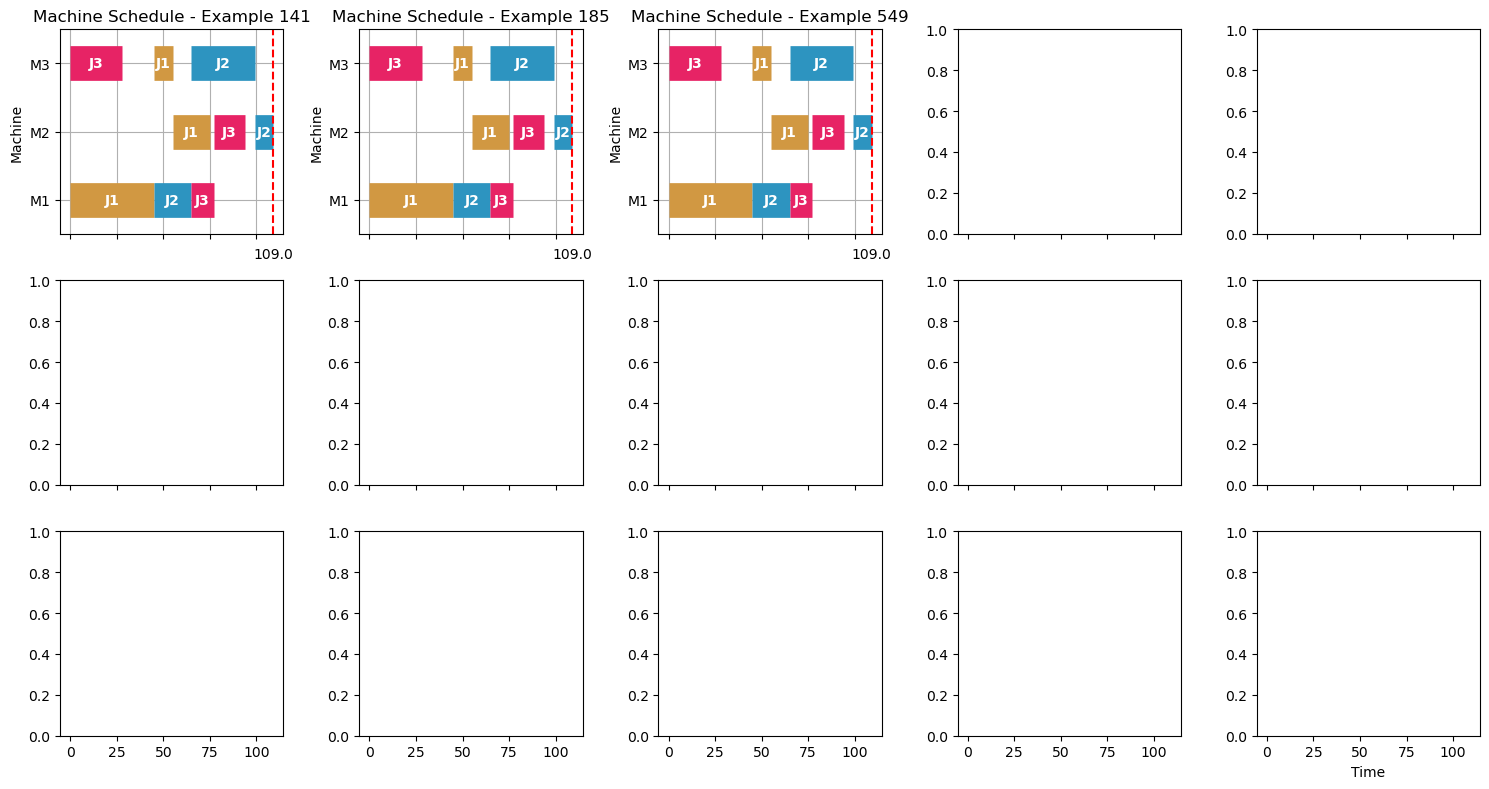

In [81]:
def visualize_gantt_chart_machine(df):
    unique_examples = df_sorted['Example'].unique()
    num_examples = len(unique_examples)
    num_rows = 3
    num_columns = 5
    num_subplots = num_rows * num_columns

    if num_examples > num_subplots:
        print("Warning: More examples than available subplots. Some examples will not be shown.")

    fig, axs = plt.subplots(min(num_rows, num_examples), num_columns, figsize=(15, 8), sharex=True)

    # Define a dictionary to map jobs to colors
    unique_jobs = df_sorted['Job'].unique()
    job_colors = {job: generate_random_color() for job in unique_jobs}

    for i, example in enumerate(unique_examples[:num_subplots]):
        example_data = df_sorted[df_sorted['Example'] == example]

        MACHINES = sorted(list(example_data['Machine'].unique()))
        makespan = example_data['End Time'].max()

        bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
        text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

        example_data.sort_values(by=['Machine', 'Start Time'])
        example_data.set_index(['Machine', 'Job'], inplace=True)

        row_idx = i // num_columns
        col_idx = i % num_columns

        axs[row_idx, col_idx].set_title(f'Machine Schedule - Example {example}')
        axs[row_idx, col_idx].set_ylabel('Machine')
        axs[row_idx, col_idx].set_ylim(0.5, len(MACHINES) + 0.5)
        axs[row_idx, col_idx].set_yticks(range(1, 1 + len(MACHINES)))
        axs[row_idx, col_idx].set_yticklabels(MACHINES)

        for mdx, m in enumerate(MACHINES, 1):
            for jdx, j in enumerate(example_data.loc[m].index, 1):
                xs = example_data.loc[(m, j), 'Start Time']
                xf = example_data.loc[(m, j), 'End Time']
                
                # Get the color for the current job
                job_color = job_colors.get(j, 'gray')  # Default to gray if not specified
                
                axs[row_idx, col_idx].plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                axs[row_idx, col_idx].text((xs + xf) / 2, mdx, j, **text_style)

        axs[row_idx, col_idx].text(makespan, axs[row_idx, col_idx].get_ylim()[0] - 0.2, "{0:0.1f}".format(makespan),
                                   ha='center', va='top')
        axs[row_idx, col_idx].plot([makespan] * 2, axs[row_idx, col_idx].get_ylim(), 'r--')
        axs[row_idx, col_idx].grid(True)

    axs[-1, -1].set_xlabel('Time')

    fig.tight_layout()
    plt.show()

# Assuming df_sorted is your DataFrame
visualize_gantt_chart_machine(df_sorted)


In [82]:
'''
# Get unique sequences from the 'Job_Machine_Sequences' column
all_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]
unique_sequences = list(set(tuple(seq) for seq in all_sequences))
# Create a dictionary to store the frequency count of job sequences
job_count = {}

# Iterate through the Job_Machine_Sequences
for sequence in top_min_end_times['Job_Machine_Sequences']:
    for i in range(0, len(sequence)-1):
        current_job, current_machine = sequence[i]
        for j in range(i + 1, len(sequence)):
            next_job, next_machine = sequence[j]

            # Create a unique identifier for the job transition
            transition_key = (current_job, current_machine, next_job, next_machine)

            # Update the frequency count for the job transition
            if transition_key in job_count:
                job_count[transition_key] += 1
            else:
                job_count[transition_key] = 1
job_count
'''

"\n# Get unique sequences from the 'Job_Machine_Sequences' column\nall_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]\nunique_sequences = list(set(tuple(seq) for seq in all_sequences))\n# Create a dictionary to store the frequency count of job sequences\njob_count = {}\n\n# Iterate through the Job_Machine_Sequences\nfor sequence in top_min_end_times['Job_Machine_Sequences']:\n    for i in range(0, len(sequence)-1):\n        current_job, current_machine = sequence[i]\n        for j in range(i + 1, len(sequence)):\n            next_job, next_machine = sequence[j]\n\n            # Create a unique identifier for the job transition\n            transition_key = (current_job, current_machine, next_job, next_machine)\n\n            # Update the frequency count for the job transition\n            if transition_key in job_count:\n                job_count[transition_key] += 1\n            else:\n                job_count[transition_key] 

In [83]:
'''
ll_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]
unique_sequences = list(set(tuple(seq) for seq in all_sequences))

# Create a NumPy array to store the frequency counts
job_count_array = np.zeros((len(unique_sequences), len(unique_sequences)))

# Create a dictionary to store the frequency count of job sequences
job_count = {}

# Iterate through the Job_Machine_Sequences
for sequence in top_min_end_times['Job_Machine_Sequences']:
    for i in range(0, len(sequence)-1):
        current_job, current_machine = sequence[i]
        for j in range(i + 1, len(sequence)):
            next_job, next_machine = sequence[j]

            # Create a unique identifier for the job transition
            transition_key = (current_job, current_machine, next_job, next_machine)

            # Update the frequency count for the job transition
            if transition_key in job_count:
                job_count[transition_key] += 1
            else:
                job_count[transition_key] = 1

# Populate the array with the frequency counts
for i, sequence1 in enumerate(unique_sequences):
    for j, sequence2 in enumerate(unique_sequences):
        for k in range(1, len(sequence1)):
            for l in range(1, len(sequence2)):
                job_count_array[i, j] += job_count.get((sequence1[k - 1], sequence1[k], sequence2[l - 1], sequence2[l]), 0)                
job_count_array
'''

"\nll_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]\nunique_sequences = list(set(tuple(seq) for seq in all_sequences))\n\n# Create a NumPy array to store the frequency counts\njob_count_array = np.zeros((len(unique_sequences), len(unique_sequences)))\n\n# Create a dictionary to store the frequency count of job sequences\njob_count = {}\n\n# Iterate through the Job_Machine_Sequences\nfor sequence in top_min_end_times['Job_Machine_Sequences']:\n    for i in range(0, len(sequence)-1):\n        current_job, current_machine = sequence[i]\n        for j in range(i + 1, len(sequence)):\n            next_job, next_machine = sequence[j]\n\n            # Create a unique identifier for the job transition\n            transition_key = (current_job, current_machine, next_job, next_machine)\n\n            # Update the frequency count for the job transition\n            if transition_key in job_count:\n                job_count[transition_key

In [23]:
# Assuming top_min_end_times is a DataFrame
# It might look something like this:
# top_min_end_times = pd.DataFrame({'Max_End_Time': [...], 'Job_Machine_Sequences': [...], 'Weight': [...]})

# Extract unique sequences and weights from the DataFrame
all_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]
unique_sequences = list(set(tuple(seq) for seq in all_sequences))

# Create a NumPy array to store the frequency counts
job_count_array = np.zeros((len(unique_sequences), len(unique_sequences)))

# Create a dictionary to store the frequency count of job sequences
job_count = {}

# Iterate through the Job_Machine_Sequences
for index, sequence in enumerate(top_min_end_times['Job_Machine_Sequences']):
    sequence_weight = top_min_end_times['Weight'].iloc[index]  # Assuming the 'Weight' column exists
    for i in range(0, len(sequence) - 1):
        current_job, current_machine = sequence[i]
        for j in range(i + 1, len(sequence)):
            next_job, next_machine = sequence[j]

            # Create a unique identifier for the job transition
            transition_key = (current_job, current_machine, next_job, next_machine)

            # Update the frequency count for the job transition with the weighted count
            if transition_key in job_count:
                job_count[transition_key] += sequence_weight
            else:
                job_count[transition_key] = sequence_weight

# Populate the array with the frequency counts
for i, sequence1 in enumerate(unique_sequences):
    for j, sequence2 in enumerate(unique_sequences):
        for k in range(1, len(sequence1)):
            for l in range(1, len(sequence2)):
                job_count_array[i, j] += job_count.get((sequence1[k - 1], sequence1[k], sequence2[l - 1], sequence2[l]), 0)
job_count_df = pd.DataFrame(job_count_array, index=unique_sequences, columns=unique_sequences)
job_count_df = job_count_df.astype(float)
job_count_df

,"(J2, M2)","(J3, M1)","(J1, M2)","(J1, M3)","(J2, M1)","(J3, M2)","(J3, M3)","(J1, M1)","(J2, M3)"
"(J2, M2)",0.000000,5.097901,10.106673,9.079887,0.000000,9.106673,0.000000,3.035558,0.000000
"(J3, M1)",10.284001,0.000000,8.053102,6.017544,0.000000,15.381902,0.000000,4.000000,6.275229
"(J1, M2)",5.275229,7.328801,0.000000,0.000000,2.110092,8.355587,0.000000,0.000000,5.275229
"(J1, M3)",6.302015,9.364358,15.381902,0.000000,3.165138,10.373130,0.000000,0.000000,5.275229
"(J2, M1)",15.381902,15.381902,13.271811,12.216765,0.000000,15.381902,3.035558,10.106673,15.381902
"(J3, M2)",6.275229,0.000000,7.026316,5.008772,0.000000,0.000000,0.000000,1.000000,2.110092
"(J3, M3)",15.381902,15.381902,15.381902,15.381902,12.346345,15.381902,0.000000,11.207993,15.381902
"(J1, M1)",12.346345,11.381902,15.381902,15.381902,5.275229,14.381902,4.173910,0.000000,8.337573
"(J2, M3)",15.381902,9.106673,10.106673,10.106673,0.000000,13.271811,0.000000,7.044330,0.000000


In [85]:
df = job_count_df.copy()
max_value = job_count_df.values.max()
df = df.replace(range(0,int(max_value//2)+1) , float('inf'))
result_df = max_value - df.values
result_df = pd.DataFrame(result_df)
result_df.columns = job_count_df.columns
result_df.index = job_count_df.index
result_df = result_df.replace(-float('inf') , float('inf'))
result_df = result_df.replace(float('inf') , 10000*max_value)
# Filter out rows where all values are equal to max_value
result_df = result_df[~(result_df.apply(lambda row: all(val == 10000*max_value for val in row), axis=1))]
#result_df = result_df[~(result_df.apply(lambda col: all(val == 10000*max_value for val in col), axis=0))]
#result_df = result_df[~(result_df.apply(lambda row: all(val == 10000*max_value for val in row), axis=1) | result_df.apply(lambda col: all(val == 10000*max_value for val in col), axis=0))]
#result_df.to_csv('Pre_Hungarian.csv')
result_df


,"(J3, M2)","(J2, M3)","(J3, M3)","(J1, M1)","(J2, M2)","(J2, M1)","(J1, M2)","(J3, M1)","(J1, M3)"
"(J3, M2)",6750000.0,6750000.0,6750000.0,6750000.0,0.0,6750000.0,6750000.0,6750000.0,6750000.0
"(J2, M3)",0.0,6750000.0,6750000.0,6750000.0,0.0,6750000.0,6750000.0,6750000.0,6750000.0
"(J3, M3)",0.0,0.0,6750000.0,225.0,0.0,225.0,0.0,0.0,0.0
"(J1, M1)",0.0,0.0,6750000.0,6750000.0,0.0,0.0,0.0,0.0,0.0
"(J2, M1)",0.0,0.0,6750000.0,6750000.0,0.0,6750000.0,0.0,0.0,0.0
"(J1, M2)",0.0,225.0,6750000.0,6750000.0,0.0,6750000.0,6750000.0,6750000.0,6750000.0
"(J3, M1)",0.0,225.0,6750000.0,6750000.0,0.0,6750000.0,225.0,6750000.0,6750000.0
"(J1, M3)",0.0,0.0,6750000.0,6750000.0,0.0,6750000.0,0.0,0.0,6750000.0


In [86]:
#Create a cost matrix (replace this with your actual cost matrix)
cost_matrix = result_df.copy()
cost_matrix = cost_matrix.values
# Use the linear_sum_assignmendt function to solve the assignment problem
row_indices, col_indices = linear_sum_assignment(cost_matrix)
optimal_assignment = []
order_assignment = []  # Initialize an empty list

for i in range(len(row_indices)):
    task_index = result_df.index[row_indices[i]]
    agent_index = result_df.columns[col_indices[i]]
    optimal_assignment.append((task_index, agent_index))
    order_assignment.append((task_index, agent_index))  # Use append() for a list
order_assignment


[(('J3', 'M2'), ('J2', 'M2')),
 (('J2', 'M3'), ('J3', 'M2')),
 (('J3', 'M3'), ('J1', 'M1')),
 (('J1', 'M1'), ('J2', 'M1')),
 (('J2', 'M1'), ('J1', 'M3')),
 (('J1', 'M2'), ('J2', 'M3')),
 (('J3', 'M1'), ('J1', 'M2')),
 (('J1', 'M3'), ('J3', 'M1'))]

In [87]:
def show_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Set the figure size
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw the graph with improved styling
    pos = nx.spring_layout(G)  # Specify a seed for reproducibility
    nx.draw(G, pos, with_labels=True, node_size=400, node_color='lightblue', edge_color='gray', font_size=5, font_color='black', font_weight='bold', arrowsize=15)

    # Show the plot
    plt.show()

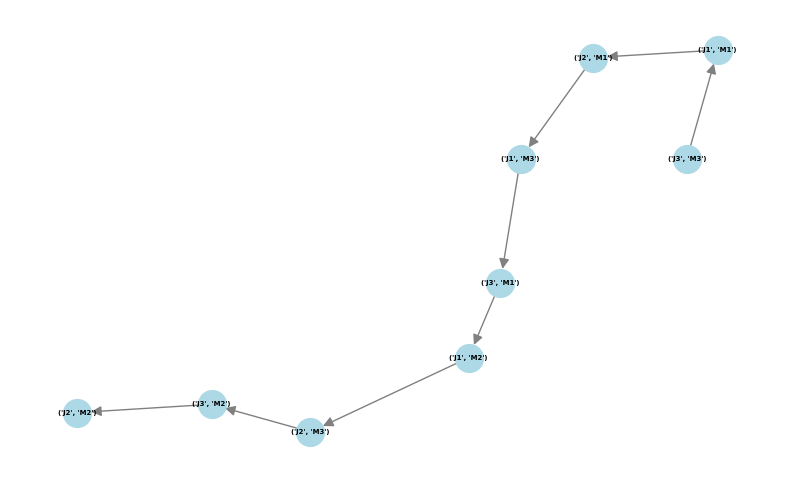

In [88]:
show_sequence(order_assignment)

In [89]:
'''
def get_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Get the topological sort
    topological_order = list(nx.topological_sort(G))

    # Create a list of job-machine sequences
    sequences = [(topological_order[i]) for i in range(len(topological_order))]

    return sequences
sequences = get_sequence(order_assignment)
print(sequences)
'''

'\ndef get_sequence(order_assignment):\n    G = nx.DiGraph()\n    for pair in order_assignment:\n        G.add_edge(pair[0], pair[1])\n\n    # Get the topological sort\n    topological_order = list(nx.topological_sort(G))\n\n    # Create a list of job-machine sequences\n    sequences = [(topological_order[i]) for i in range(len(topological_order))]\n\n    return sequences\nsequences = get_sequence(order_assignment)\nprint(sequences)\n'

In [90]:
def get_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Check if the graph has cycles
    if not nx.is_directed_acyclic_graph(G):
        print("The graph contains cycles. Removing cycles...")
        cycles = list(nx.simple_cycles(G))
        # Break the cycles by removing edges
        for cycle in cycles:
            for i in range(len(cycle)):
                G.remove_edge(cycle[i], cycle[(i+1) % len(cycle)])  # Remove edges to break the cycle

    # Get the topological sort
    topological_order = list(nx.topological_sort(G))

    # Create a list of job-machine sequences
    sequences = [(topological_order[i]) for i in range(len(topological_order))]

    return sequences


In [91]:
def job_shop_scheduling_sequence(TASKS, sequence):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    for task_pair in sequence:
        job, machine = task_pair
        next_task = next((task for task in TASKS if task['job'] == job and task['machine'] == machine), None)

        if next_task:
            start_time = max(job_times[job], machine_times[machine])
            end_time = start_time + next_task['dur']
            schedule = (job, machine, start_time, end_time)
            job_times[job] = end_time
            machine_times[machine] = end_time
            schedules.append(schedule)
            TASKS.remove(next_task)

    return schedules
result_schedules = job_shop_scheduling_sequence(original_TASKS.copy(), sequences)
result_schedules


[('J2', 'M1', 0, 20),
 ('J1', 'M1', 20, 65),
 ('J3', 'M3', 0, 28),
 ('J2', 'M3', 28, 62),
 ('J1', 'M3', 65, 75),
 ('J3', 'M1', 65, 77),
 ('J3', 'M2', 77, 94),
 ('J2', 'M2', 94, 104),
 ('J1', 'M2', 104, 124)]

In [92]:
def job_shop_scheduling_sequence_to_df(schedule_data):
    df_schedule = pd.DataFrame(schedule_data, columns=['Job', 'Machine', 'Start Time', 'End Time'])

# Add the 'Example' column
    df_schedule['Example'] = (df_schedule.groupby(['Job', 'Machine']).cumcount() + 1).astype(str)

# Reorder columns
    df_schedule = df_schedule[['Example', 'Job', 'Machine', 'Start Time', 'End Time']]

# Print the DataFrame
    return(df_schedule)

In [93]:
job_shop_scheduling_sequence_to_df(result_schedules)

,Example,Job,Machine,Start Time,End Time
0,1,J2,M1,0,20
1,1,J1,M1,20,65
2,1,J3,M3,0,28
3,1,J2,M3,28,62
4,1,J1,M3,65,75
5,1,J3,M1,65,77
6,1,J3,M2,77,94
7,1,J2,M2,94,104
8,1,J1,M2,104,124


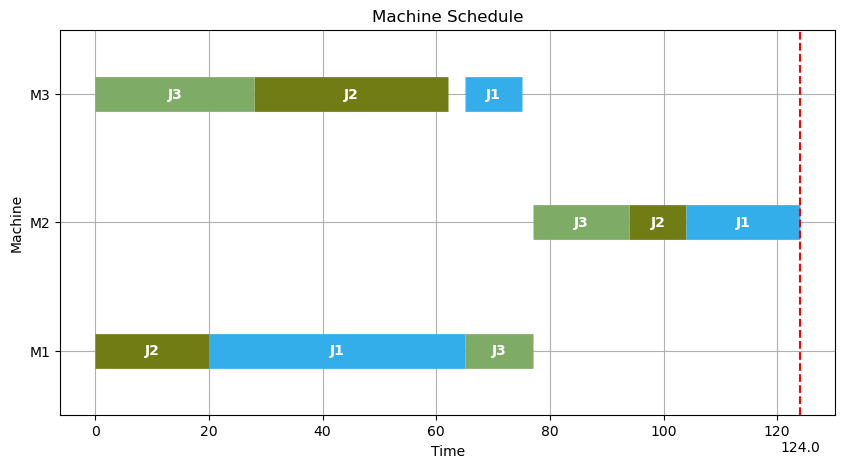

In [94]:
# Plot this sequence
def visualize_gantt_chart_machine_sequence(df):
    MACHINES = sorted(list(df['Machine'].unique()))
    unique_jobs = df['Job'].unique()
    num_jobs = len(unique_jobs)
    makespan = df['End Time'].max()

    # Define a dictionary to map jobs to colors
    job_colors = {job: generate_random_color() for job in unique_jobs}

    plt.figure(figsize=(10, 5))

    bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
    text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

    df.sort_values(by=['Machine', 'Start Time'])
    df.set_index(['Machine', 'Job'], inplace=True)

    plt.title('Machine Schedule')
    plt.ylabel('Machine')
    plt.ylim(0.5, len(MACHINES) + 0.5)
    plt.yticks(range(1, 1 + len(MACHINES)), MACHINES)

    for mdx, m in enumerate(MACHINES, 1):
        for jdx, j in enumerate(unique_jobs, 1):
            if (m, j) in df.index:
                xs = df.loc[(m, j), 'Start Time']
                xf = df.loc[(m, j), 'End Time']

                # Get the color for the current job
                job_color = job_colors.get(j, 'gray')  # Default to gray if not specified

                plt.plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                plt.text((xs + xf) / 2, mdx, j, **text_style)

    plt.text(makespan, plt.ylim()[0] - 0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
    plt.plot([makespan] * 2, plt.ylim(), 'r--')
    plt.grid(True)

    plt.xlabel('Time')
    plt.show()

# Assuming df_sorted is your DataFrame
# To visualize all examples, use: visualize_gantt_chart_machine(df_sorted)
visualize_gantt_chart_machine_sequence(job_shop_scheduling_sequence_to_df(result_schedules))


# Combine code 

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linear_sum_assignment
import networkx as nx
import time

In [2]:
def change_input(data):
    TASKS = []
    for job, line in enumerate(data.splitlines()[1:], start=1):
        nums = line.split()
        prec = None
        for i in range(0, len(nums), 2):
            m = int(nums[i]) + 1
            dur = int(nums[i + 1])
            task = {'job': f"J{job}", 'machine': f"M{m}", 'dur': dur, 'prec': prec}
            TASKS.append(task)
            prec = (f"J{job}", f"M{m}")
    return TASKS


In [3]:
la01 = """
1	21	0	53	4	95	3	55	2	34
0	21	3	52	4	16	2	26	1	71
3	39	4	98	1	42	2	31	0	12
1	77	0	55	4	79	2	66	3	77
0	83	3	34	2	64	1	19	4	37
1	54	2	43	4	79	0	92	3	62
3	69	4	77	1	87	2	87	0	93
2	38	0	60	1	41	3	24	4	83
3	17	1	49	4	25	0	44	2	98
4	77	3	79	2	43	1	75	0	96
"""

la01 = change_input(la01)

In [4]:
la02 = """
0	20	3	87	1	31	4	76	2	17
4	25	2	32	0	24	1	18	3	81
1	72	2	23	4	28	0	58	3	99
2	86	1	76	4	97	0	45	3	90
4	27	0	42	3	48	2	17	1	46
1	67	0	98	4	48	3	27	2	62
4	28	1	12	3	19	0	80	2	50
1	63	0	94	2	98	3	50	4	80
4	14	0	75	2	50	1	41	3	55
4	72	2	18	1	37	3	79	0	61
"""
la02 = change_input(la02)

In [6]:
la03 = """
1	23	2	45	0	82	4	84	3	38
2	21	1	29	0	18	4	41	3	50
2	38	3	54	4	16	0	52	1	52
4	37	0	54	2	74	1	62	3	57
4	57	0	81	1	61	3	68	2	30
4	81	0	79	1	89	2	89	3	11
3	33	2	20	0	91	4	20	1	66
4	24	1	84	0	32	2	55	3	8
4	56	0	7	3	54	2	64	1	39
4	40	1	83	0	19	2	8	3	7
"""
la03 = change_input(la03)

In [7]:
la04 = """
0	12	2	94	3	92	4	91	1	7
1	19	3	11	4	66	2	21	0	87
1	14	0	75	3	13	4	16	2	20
2	95	4	66	0	7	3	7	1	77
1	45	3	6	4	89	0	15	2	34
3	77	2	20	0	76	4	88	1	53
2	74	1	88	0	52	3	27	4	9
1	88	3	69	0	62	4	98	2	52
2	61	4	9	0	62	1	52	3	90
2	54	4	5	3	59	1	15	0	88
"""
la04 = change_input(la04)

In [8]:
la05 = """
1	72	0	87	4	95	2	66	3	60
4	5	3	35	0	48	2	39	1	54
1	46	3	20	2	21	0	97	4	55
0	59	3	19	4	46	1	34	2	37
4	23	2	73	3	25	1	24	0	28
3	28	0	45	4	5	1	78	2	83
0	53	3	71	1	37	4	29	2	12
4	12	2	87	3	33	1	55	0	38
2	49	3	83	1	40	0	48	4	7
2	65	3	17	0	90	4	27	1	23
"""
la05 = change_input(la05)

In [9]:
la06 = """
1	21	2	34	4	95	0	53	3	55
3	52	4	16	1	71	2	26	0	21
2	31	0	12	1	42	3	39	4	98
3	77	1	77	4	79	0	55	2	66
4	37	3	34	2	64	1	19	0	83
2	43	1	54	0	92	3	62	4	79
0	93	3	69	1	87	4	77	2	87
0	60	1	41	2	38	4	83	3	24
2	98	3	17	4	25	0	44	1	49
0	96	4	77	3	79	1	75	2	43
4	28	2	35	0	95	3	76	1	7
0	61	4	10	2	95	1	9	3	35
4	59	3	16	1	91	2	59	0	46
4	43	1	52	0	28	2	27	3	50
0	87	1	45	2	39	4	9	3	41
"""
la06 = change_input(la06)

In [10]:
la07 = """
0	47	4	57	1	71	3	96	2	14
0	75	1	60	4	22	3	79	2	65
3	32	0	33	2	69	1	31	4	58
0	44	1	34	4	51	3	58	2	47
3	29	1	44	0	62	2	17	4	8
1	15	2	40	0	97	4	38	3	66
2	58	1	39	0	57	4	20	3	50
2	57	3	32	4	87	0	63	1	21
4	56	0	84	2	90	1	85	3	61
4	15	0	20	1	67	3	30	2	70
4	84	0	82	1	23	2	45	3	38
3	50	2	21	0	18	4	41	1	29
4	16	1	52	0	52	2	38	3	54
4	37	0	54	3	57	2	74	1	62
4	57	1	61	0	81	2	30	3	68
"""
la07 = change_input(la07)

In [11]:
la08 = """
3	92	2	94	0	12	4	91	1	7
2	21	1	19	0	87	3	11	4	66
1	14	3	13	0	75	4	16	2	20
2	95	4	66	0	7	1	77	3	7
2	34	4	89	3	6	1	45	0	15
4	88	3	77	2	20	1	53	0	76
4	9	3	27	0	52	1	88	2	74
3	69	2	52	0	62	1	88	4	98
3	90	0	62	4	9	2	61	1	52
4	5	2	54	3	59	0	88	1	15
0	41	1	50	4	78	3	53	2	23
0	38	4	72	2	91	3	68	1	71
0	45	3	95	4	52	2	25	1	6
3	30	1	66	0	23	4	36	2	17
2	95	0	71	3	76	1	8	4	88
"""
la08 = change_input(la08)

In [5]:
la09 = """
1	66	3	85	2	84	0	62	4	19
3	59	1	64	2	46	4	13	0	25
4	88	3	80	1	73	2	53	0	41
0	14	1	67	2	57	3	74	4	47
0	84	4	64	2	41	3	84	1	78
0	63	3	28	1	46	2	26	4	52
3	10	2	17	4	73	1	11	0	64
2	67	1	97	3	95	4	38	0	85
2	95	4	46	0	59	1	65	3	93
2	43	4	85	3	32	1	85	0	60
4	49	3	41	2	61	0	66	1	90
1	17	0	23	3	70	4	99	2	49
4	40	3	73	0	73	1	98	2	68
3	57	1	9	2	7	0	13	4	98
0	37	1	85	2	17	4	79	3	41
"""
la09 = change_input(la09)

In [6]:
la10 = """
1	58	2	44	3	5	0	9	4	58
1	89	0	97	4	96	3	77	2	84
0	77	1	87	2	81	4	39	3	85
3	57	1	21	2	31	0	15	4	73
2	48	0	40	1	49	3	70	4	71
3	34	4	82	2	80	0	10	1	22
1	91	4	75	0	55	2	17	3	7
2	62	3	47	1	72	4	35	0	11
0	64	3	75	4	50	1	90	2	94
2	67	4	20	3	15	0	12	1	71
0	52	4	93	3	68	2	29	1	57
2	70	0	58	1	93	4	7	3	77
3	27	2	82	1	63	4	6	0	95
1	87	2	56	4	36	0	26	3	48
3	76	2	36	0	36	4	15	1	8
"""
la10 = change_input(la10)

In [7]:
la11 = """
2	34	1	21	0	53	3	55	4	95
0	21	3	52	1	71	4	16	2	26
0	12	1	42	2	31	4	98	3	39
2	66	3	77	4	79	0	55	1	77
0	83	4	37	3	34	1	19	2	64
4	79	2	43	0	92	3	62	1	54
0	93	4	77	2	87	1	87	3	69
4	83	3	24	1	41	2	38	0	60
4	25	1	49	0	44	2	98	3	17
0	96	1	75	2	43	4	77	3	79
0	95	3	76	1	7	4	28	2	35
4	10	2	95	0	61	1	9	3	35
1	91	2	59	4	59	0	46	3	16
2	27	1	52	4	43	0	28	3	50
4	9	0	87	3	41	2	39	1	45
1	54	0	20	4	43	3	14	2	71
4	33	1	28	3	26	0	78	2	37
1	89	0	33	2	8	3	66	4	42
4	84	0	69	2	94	1	74	3	27
4	81	2	45	1	78	3	69	0	96
"""
la11 = change_input(la11)

In [8]:
la12 = """
1	23	0	82	4	84	2	45	3	38
3	50	4	41	1	29	0	18	2	21
4	16	3	54	1	52	2	38	0	52
1	62	3	57	4	37	2	74	0	54
3	68	1	61	2	30	0	81	4	57
1	89	2	89	3	11	0	79	4	81
1	66	0	91	3	33	4	20	2	20
3	8	4	24	2	55	0	32	1	84
0	7	2	64	1	39	4	56	3	54
0	19	4	40	3	7	2	8	1	83
0	63	2	64	3	91	4	40	1	6
1	42	3	61	4	15	2	98	0	74
1	80	0	26	3	75	4	6	2	87
2	39	4	22	0	75	3	24	1	44
1	15	3	79	4	8	0	12	2	20
3	26	2	43	0	80	4	22	1	61
2	62	1	36	0	63	3	96	4	40
1	33	3	18	0	22	4	5	2	10
2	64	4	64	0	89	1	96	3	95
2	18	4	23	3	15	1	38	0	8
"""
la12 = change_input(la12)

In [9]:
la13 = """
3	60	0	87	1	72	4	95	2	66
1	54	0	48	2	39	3	35	4	5
3	20	1	46	0	97	2	21	4	55
2	37	0	59	3	19	1	34	4	46
2	73	3	25	1	24	0	28	4	23
1	78	3	28	2	83	0	45	4	5
3	71	1	37	2	12	4	29	0	53
4	12	3	33	1	55	2	87	0	38
0	48	1	40	2	49	3	83	4	7
0	90	4	27	2	65	3	17	1	23
0	62	3	85	1	66	2	84	4	19
3	59	2	46	4	13	1	64	0	25
2	53	1	73	3	80	4	88	0	41
2	57	4	47	0	14	1	67	3	74
2	41	4	64	3	84	1	78	0	84
4	52	3	28	2	26	0	63	1	46
1	11	0	64	3	10	4	73	2	17
4	38	3	95	0	85	1	97	2	67
3	93	1	65	2	95	0	59	4	46
0	60	1	85	2	43	4	85	3	32
"""
la13 = change_input(la13)

In [10]:
la14 = """
3	5	4	58	2	44	0	9	1	58
1	89	4	96	0	97	2	84	3	77
2	81	3	85	1	87	4	39	0	77
0	15	3	57	4	73	1	21	2	31
2	48	4	71	3	70	0	40	1	49
0	10	4	82	3	34	2	80	1	22
2	17	0	55	1	91	4	75	3	7
3	47	2	62	1	72	4	35	0	11
1	90	2	94	4	50	0	64	3	75
3	15	2	67	0	12	4	20	1	71
4	93	2	29	0	52	1	57	3	68
3	77	1	93	0	58	2	70	4	7
1	63	3	27	0	95	4	6	2	82
4	36	0	26	3	48	2	56	1	87
2	36	1	8	4	15	3	76	0	36
4	78	1	84	3	41	0	30	2	76
1	78	0	75	4	88	3	13	2	81
0	54	4	40	2	13	1	82	3	29
1	26	4	82	0	52	3	6	2	6
3	54	1	64	0	54	2	32	4	88
"""
la14 = change_input(la14)

In [11]:
la15 = """
0	6	2	40	1	81	3	37	4	19
2	40	3	32	0	55	4	81	1	9
1	46	4	65	2	70	3	55	0	77
2	21	4	65	0	64	3	25	1	15
2	85	0	40	1	44	3	24	4	37
0	89	4	29	1	83	3	31	2	84
4	59	3	38	1	80	2	30	0	8
0	80	2	56	1	77	4	41	3	97
4	56	0	91	3	50	2	71	1	17
1	40	0	88	4	59	2	7	3	80
0	45	1	29	2	8	4	77	3	58
2	36	0	54	3	96	1	9	4	10
0	28	2	73	1	98	3	92	4	87
0	70	3	86	2	27	1	99	4	96
1	95	0	59	4	56	3	85	2	41
1	81	2	92	4	32	0	52	3	39
1	7	4	22	2	12	0	88	3	60
3	45	0	93	2	69	4	49	1	27
0	21	1	84	2	61	3	68	4	26
1	82	2	33	4	71	0	99	3	44
"""
la15 = change_input(la15)

In [12]:
ft06 = """
2	1	0	3	1	6	3	7	5	3	4	6
1	8	2	5	4	10	5	10	0	10	3	4
2	5	3	4	5	8	0	9	1	1	4	7
1	5	0	5	2	5	3	3	4	8	5	9
2	9	1	3	4	5	5	4	0	3	3	1
1	3	3	3	5	9	0	10	4	4	2	1
"""
ft06 = change_input(ft06)

In [13]:
ft10 = """
0	29	1	78	2	9	3	36	4	49	5	11	6	62	7	56	8	44	9	21
0	43	2	90	4	75	9	11	3	69	1	28	6	46	5	46	7	72	8	30
1	91	0	85	3	39	2	74	8	90	5	10	7	12	6	89	9	45	4	33
1	81	2	95	0	71	4	99	6	9	8	52	7	85	3	98	9	22	5	43
2	14	0	6	1	22	5	61	3	26	4	69	8	21	7	49	9	72	6	53
2	84	1	2	5	52	3	95	8	48	9	72	0	47	6	65	4	6	7	25
1	46	0	37	3	61	2	13	6	32	5	21	9	32	8	89	7	30	4	55
2	31	0	86	1	46	5	74	4	32	6	88	8	19	9	48	7	36	3	79
0	76	1	69	3	76	5	51	2	85	9	11	6	40	7	89	4	26	8	74
1	85	0	13	2	61	6	7	8	64	9	76	5	47	3	52	4	90	7	45
"""
ft10 = change_input(ft10)

     Example  Max_End_Time                              Job_Machine_Sequences  \
745      745          1418  [[J6, M3], [J4, M2], [J1, M1], [J3, M2], [J1, ...   

     Weight  
745     225  
[('J6', 'M3'), ('J4', 'M2'), ('J1', 'M1'), ('J3', 'M2'), ('J1', 'M2'), ('J9', 'M1'), ('J5', 'M3'), ('J6', 'M2'), ('J7', 'M2'), ('J8', 'M3'), ('J1', 'M3'), ('J9', 'M2'), ('J3', 'M1'), ('J6', 'M6'), ('J6', 'M4'), ('J10', 'M2'), ('J4', 'M3'), ('J3', 'M4'), ('J4', 'M1'), ('J10', 'M1'), ('J7', 'M1'), ('J8', 'M1'), ('J9', 'M4'), ('J3', 'M3'), ('J1', 'M4'), ('J4', 'M5'), ('J2', 'M1'), ('J10', 'M3'), ('J3', 'M9'), ('J5', 'M1'), ('J2', 'M3'), ('J4', 'M7'), ('J1', 'M5'), ('J2', 'M5'), ('J1', 'M6'), ('J3', 'M6'), ('J10', 'M7'), ('J1', 'M7'), ('J9', 'M6'), ('J7', 'M4'), ('J5', 'M2'), ('J4', 'M9'), ('J3', 'M8'), ('J8', 'M2'), ('J5', 'M6'), ('J8', 'M6'), ('J2', 'M10'), ('J8', 'M5'), ('J7', 'M3'), ('J3', 'M7'), ('J10', 'M9'), ('J7', 'M7'), ('J10', 'M10'), ('J5', 'M4'), ('J2', 'M4'), ('J10', 'M6'), ('J5', 'M5'), (

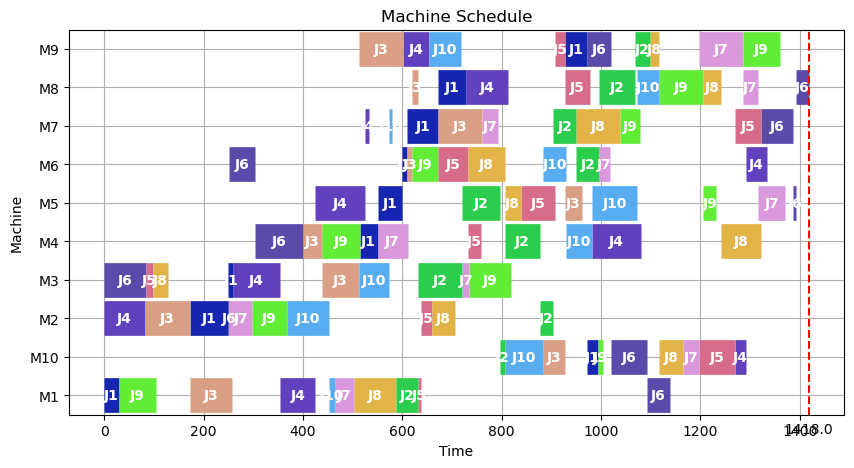

The time of execution of above program is : 6.590517997741699


In [887]:
start = time.time()
def job_shop_scheduling_random_choose(TASKS):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    while TASKS:
        # Find tasks that can be scheduled
        schedulable_tasks = [task for task in TASKS if task['prec'] is None or task['prec'] in [(s[0], s[1]) for s in schedules]]

        if schedulable_tasks:
            next_task = random.choice(schedulable_tasks)
        else:
            # If no schedulable tasks, break the loop to avoid infinite loop
            break

        job, machine = next_task['job'], next_task['machine']
        start_time = max(job_times[job], machine_times[machine])
        end_time = start_time + next_task['dur']
        schedule = (job, machine, start_time, end_time)
        job_times[job] = end_time
        machine_times[machine] = end_time
        schedules.append(schedule)
        TASKS.remove(next_task)

    return schedules

def sampling_jss(TASKS , rev):
  all_schedules = {}
  for i in range(rev):
    # Make a copy of the original_TASKS to use in each example
    #task = copy.deepcopy(TASKS)
    task = TASKS.copy()
    example_schedule = job_shop_scheduling_random_choose(task)

    # Store the schedule in the dictionary with the example number as the key
    all_schedules[i] = example_schedule
  return all_schedules

# Create an empty list to store scheduling information
scheduling_info = []

# Input TASK here!!!!!!
for example, schedule in sampling_jss(ft10,1000).items():
    for step, (job, machine, start_time, end_time) in enumerate(schedule, start=1):
        scheduling_info.append({'Example': example, 'Job': job, 'Machine': machine, 'Start Time': start_time, 'End Time': end_time})
df = pd.DataFrame(scheduling_info)

# Convert the "End Time" column to numeric
df['End Time'] = pd.to_numeric(df['End Time'])

# Group the DataFrame by the "Example" column
grouped = df.groupby('Example')

# Initialize empty lists to store results
max_end_times = []
job_machine_sequences = []

# Iterate through each example group
for example, group in grouped:
    # Find the index of the maximum end time for this example
    max_end_time_index = group['End Time'].idxmax()

    # Get all job and machine sequences for this example
    sequences = group[['Job', 'Machine']].values.tolist()

    # Append the results to the lists
    max_end_times.append(group.loc[max_end_time_index, 'End Time'])
    job_machine_sequences.append(sequences)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Example': grouped.groups.keys(), 'Max_End_Time': max_end_times, 'Job_Machine_Sequences': job_machine_sequences})

# Sort the DataFrame by the "Min_End_Time" column in ascending order
sorted_df = result_df.copy().sort_values(by='Max_End_Time', ascending=True)
#print(sorted_df)
# Get the top 15 minimum end times and their associated sequences
top_min_end_times= sorted_df.head(1)
top_min_end_times = top_min_end_times[['Example' , 'Max_End_Time' , 'Job_Machine_Sequences']]
top_min_end_times_example = top_min_end_times['Example'].values

# Get unique values of 'Max_End_Time' and assign weights
unique_max_end_times = top_min_end_times['Max_End_Time'].unique()
weights = {max_end_time: 225*len(unique_max_end_times) - 225*i for i, max_end_time in enumerate(unique_max_end_times)}

# Assign weights based on 'Max_End_Time'
top_min_end_times['Weight'] = top_min_end_times['Max_End_Time'].map(weights)
print(top_min_end_times)
df_sorted = df.copy()
df_sorted = df[df['Example'].isin(top_min_end_times_example)]

def generate_random_color():
    # Generate a random color in hexadecimal format
    return "#{:06x}".format(np.random.randint(0, 256**3))

def visualize_gantt_chart_machine(df):
    unique_examples = df_sorted['Example'].unique()
    num_examples = len(unique_examples)
    num_rows = 5
    num_columns = 3
    num_subplots = num_rows * num_columns

    if num_examples > num_subplots:
        print("Warning: More examples than available subplots. Some examples will not be shown.")

    fig, axs = plt.subplots(min(num_rows, num_examples), num_columns, figsize=(15, 8), sharex=True)

    # Define a dictionary to map jobs to colors
    unique_jobs = df_sorted['Job'].unique()
    job_colors = {job: generate_random_color() for job in unique_jobs}

    for i, example in enumerate(unique_examples[:num_subplots]):
        example_data = df_sorted[df_sorted['Example'] == example]

        MACHINES = sorted(list(example_data['Machine'].unique()))
        makespan = example_data['End Time'].max()

        bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
        text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

        example_data.sort_values(by=['Machine', 'Start Time'])
        example_data.set_index(['Machine', 'Job'], inplace=True)

        row_idx = i // num_columns
        col_idx = i % num_columns

        axs[row_idx, col_idx].set_title(f'Machine Schedule - Example {example}')
        axs[row_idx, col_idx].set_ylabel('Machine')
        axs[row_idx, col_idx].set_ylim(0.5, len(MACHINES) + 0.5)
        axs[row_idx, col_idx].set_yticks(range(1, 1 + len(MACHINES)))
        axs[row_idx, col_idx].set_yticklabels(MACHINES)

        for mdx, m in enumerate(MACHINES, 1):
            for jdx, j in enumerate(example_data.loc[m].index, 1):
                xs = example_data.loc[(m, j), 'Start Time']
                xf = example_data.loc[(m, j), 'End Time']
                
                # Get the color for the current job
                job_color = job_colors.get(j, 'gray')  # Default to gray if not specified
                
                axs[row_idx, col_idx].plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                axs[row_idx, col_idx].text((xs + xf) / 2, mdx, j, **text_style)

        axs[row_idx, col_idx].text(makespan, axs[row_idx, col_idx].get_ylim()[0] - 0.2, "{0:0.1f}".format(makespan),
                                   ha='center', va='top')
        axs[row_idx, col_idx].plot([makespan] * 2, axs[row_idx, col_idx].get_ylim(), 'r--')
        axs[row_idx, col_idx].grid(True)

    axs[-1, -1].set_xlabel('Time')

    fig.tight_layout()
    plt.show()

# Assuming df_sorted is your DataFrame
#visualize_gantt_chart_machine(df_sorted)

# Extract unique sequences and weights from the DataFrame
all_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]
unique_sequences = list(set(tuple(seq) for seq in all_sequences))

# Create a NumPy array to store the frequency counts
job_count_array = np.zeros((len(unique_sequences), len(unique_sequences)))

# Create a dictionary to store the frequency count of job sequences
job_count = {}

# Iterate through the Job_Machine_Sequences
for index, sequence in enumerate(top_min_end_times['Job_Machine_Sequences']):
    sequence_weight = top_min_end_times['Weight'].iloc[index]  # Assuming the 'Weight' column exists
    for i in range(0, len(sequence) - 1):
        current_job, current_machine = sequence[i]
        for j in range(i + 1, len(sequence)):
            next_job, next_machine = sequence[j]

            # Create a unique identifier for the job transition
            transition_key = (current_job, current_machine, next_job, next_machine)

            # Update the frequency count for the job transition with the weighted count
            if transition_key in job_count:
                job_count[transition_key] += sequence_weight
            else:
                job_count[transition_key] = sequence_weight

# Populate the array with the frequency counts
for i, sequence1 in enumerate(unique_sequences):
    for j, sequence2 in enumerate(unique_sequences):
        for k in range(1, len(sequence1)):
            for l in range(1, len(sequence2)):
                job_count_array[i, j] += job_count.get((sequence1[k - 1], sequence1[k], sequence2[l - 1], sequence2[l]), 0)
job_count_df = pd.DataFrame(job_count_array, index=unique_sequences, columns=unique_sequences)
job_count_df = job_count_df.astype(int)

df = job_count_df.copy()
max_value = job_count_df.values.max()
df = df.replace(range(0,(max_value//2)+1) , float('inf'))
result_df = max_value - df.values
result_df = pd.DataFrame(result_df)
result_df.columns = job_count_df.columns
result_df.index = job_count_df.index
result_df = result_df.replace(-float('inf') , float('inf'))
result_df = result_df.replace(float('inf') , 10000*max_value)
# Filter out rows where all values are equal to max_value
result_df = result_df[~(result_df.apply(lambda row: all(val == 10000*max_value for val in row), axis=1))]
#result_df = result_df.loc[:, ~(result_df.apply(lambda col: all(col[i] <= col[i+1] for i in range(len(col)-1)), axis=0))]

#Create a cost matrix (replace this with your actual cost matrix)
cost_matrix = result_df.copy()
cost_matrix = cost_matrix.values
# Use the linear_sum_assignmendt function to solve the assignment problem
row_indices, col_indices = linear_sum_assignment(cost_matrix)
optimal_assignment = []
order_assignment = []  # Initialize an empty list

for i in range(len(row_indices)):
    task_index = result_df.index[row_indices[i]]
    agent_index = result_df.columns[col_indices[i]]
    optimal_assignment.append((task_index, agent_index))
    order_assignment.append((task_index, agent_index))  # Use append() for a list

def show_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Set the figure size
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw the graph with improved styling
    pos = nx.spring_layout(G)  # Specify a seed for reproducibility
    nx.draw(G, pos, with_labels=True, node_size=400, node_color='lightblue', edge_color='gray', font_size=5, font_color='black', font_weight='bold', arrowsize=15)

    # Show the plot
    plt.show()

#show_sequence(order_assignment)

def get_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Check if the graph has cycles
    if not nx.is_directed_acyclic_graph(G):
        print("The graph contains cycles. Removing cycles...")
        cycles = list(nx.simple_cycles(G))
        # Break the cycles by removing edges
        for cycle in cycles:
            for i in range(len(cycle)):
                G.remove_edge(cycle[i], cycle[(i+1) % len(cycle)])  # Remove edges to break the cycle

    # Get the topological sort
    topological_order = list(nx.topological_sort(G))

    # Create a list of job-machine sequences
    sequences = [(topological_order[i]) for i in range(len(topological_order))]

    return sequences

sequences = get_sequence(order_assignment)
print(sequences)

def job_shop_scheduling_sequence(TASKS, sequence):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    for task_pair in sequence:
        job, machine = task_pair
        next_task = next((task for task in TASKS if task['job'] == job and task['machine'] == machine), None)

        if next_task:
            start_time = max(job_times[job], machine_times[machine])
            end_time = start_time + next_task['dur']
            schedule = (job, machine, start_time, end_time)
            job_times[job] = end_time
            machine_times[machine] = end_time
            schedules.append(schedule)
            TASKS.remove(next_task)

    return schedules
## Input task here !!!!!!
result_schedules = job_shop_scheduling_sequence(ft10.copy(), sequences)

def job_shop_scheduling_sequence_to_df(schedule_data):
    df_schedule = pd.DataFrame(schedule_data, columns=['Job', 'Machine', 'Start Time', 'End Time'])

# Add the 'Example' column
    df_schedule['Example'] = (df_schedule.groupby(['Job', 'Machine']).cumcount() + 1).astype(str)

# Reorder columns
    df_schedule = df_schedule[['Example', 'Job', 'Machine', 'Start Time', 'End Time']]

# Print the DataFrame
    return(df_schedule)

def visualize_gantt_chart_machine_sequence(df):
    MACHINES = sorted(list(df['Machine'].unique()))
    unique_jobs = df['Job'].unique()
    num_jobs = len(unique_jobs)
    makespan = df['End Time'].max()

    # Define a dictionary to map jobs to colors
    job_colors = {job: generate_random_color() for job in unique_jobs}

    plt.figure(figsize=(10, 5))

    bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
    text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

    df.sort_values(by=['Machine', 'Start Time'])
    df.set_index(['Machine', 'Job'], inplace=True)

    plt.title('Machine Schedule')
    plt.ylabel('Machine')
    plt.ylim(0.5, len(MACHINES) + 0.5)
    plt.yticks(range(1, 1 + len(MACHINES)), MACHINES)

    for mdx, m in enumerate(MACHINES, 1):
        for jdx, j in enumerate(unique_jobs, 1):
            if (m, j) in df.index:
                xs = df.loc[(m, j), 'Start Time']
                xf = df.loc[(m, j), 'End Time']

                # Get the color for the current job
                job_color = job_colors.get(j, 'gray')  # Default to gray if not specified

                plt.plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                plt.text((xs + xf) / 2, mdx, j, **text_style)

    plt.text(makespan, plt.ylim()[0] - 0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
    plt.plot([makespan] * 2, plt.ylim(), 'r--')
    plt.grid(True)

    plt.xlabel('Time')
    plt.show()

# Assuming df_sorted is your DataFrame
# To visualize all examples, use: visualize_gantt_chart_machine(df_sorted)
end = time.time()
visualize_gantt_chart_machine_sequence(job_shop_scheduling_sequence_to_df(result_schedules))
print("The time of execution of above program is :",
      (end-start))

IndentationError: expected an indented block after function definition on line 32 (842688193.py, line 33)